In [245]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [246]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(iris_df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [247]:
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [248]:
# Frecuencia porcentual
(iris_df['species'].value_counts(normalize=True) * 100).round(2)         

species
setosa        33.33
versicolor    33.33
virginica     33.33
Name: proportion, dtype: float64

In [249]:
# Moda
iris_df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


In [250]:
import numpy as np
vec = np.random.normal(20, 10, 10)
mean_vec = np.mean(vec)
vec_outlier = np.append(vec, np.random.normal(300, 100)) 
mean_vec_outlier = np.mean(vec_outlier)
(mean_vec, mean_vec_outlier)

(np.float64(21.574221681162204), np.float64(33.66414994106778))

In [251]:
from scipy import stats
trimmed_mean_vec = stats.trim_mean(vec, 0.1)
trimmed_mean_vec_outlier = stats.trim_mean(vec_outlier, 0.1)
trimmed_mean_vec_outlier

np.float64(24.585790552218086)

In [252]:
median_vec = np.median(vec)
median_vec_outlier = np.median(vec_outlier)
(median_vec, median_vec_outlier)

(np.float64(23.23371014512584), np.float64(23.33674327374267))

In [253]:
percentiles = iris_df['sepal length (cm)'].quantile([i/100 for i in range(101)])
percentiles

0.00    4.300
0.01    4.400
0.02    4.400
0.03    4.547
0.04    4.600
        ...  
0.96    7.408
0.97    7.653
0.98    7.700
0.99    7.700
1.00    7.900
Name: sepal length (cm), Length: 101, dtype: float64

In [254]:
iris_df['sepal length (cm)'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: sepal length (cm), dtype: float64

In [255]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [256]:
iris_df.groupby('species', observed=False)['sepal length (cm)'].describe()
iris_df.groupby('species', observed=False)['sepal width (cm)'].describe()
iris_df.groupby('species', observed=False)['petal length (cm)'].describe()
iris_df.groupby('species', observed=False)['petal width (cm)'].describe()


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


In [257]:
iris_df.groupby('species', observed=False)['petal length (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [258]:
iris_df['sepal length (cm)'].max() - iris_df['sepal length (cm)'].min()

np.float64(3.6000000000000005)

In [259]:
iris_df['sepal length (cm)'].var()

np.float64(0.6856935123042507)

In [260]:
iris_df['sepal length (cm)'].std()

np.float64(0.828066127977863)

In [261]:
import numpy as np

def aad(x, fun=np.median):
    return np.mean(abs(x - fun(x)))

result1 = aad(iris_df['sepal length (cm)'])
result2 = aad(iris_df['sepal length (cm)'], np.mean)
print(result1)
print(result2)

0.6846666666666668
0.6875555555555557


In [262]:
# iris_df['sepal length (cm)'].mad()  DEPRECATED

In [263]:
iris_df['sepal length (cm)'].quantile(0.75) - iris_df['sepal length (cm)'].quantile(0.25)

np.float64(1.3000000000000007)

In [264]:
iris_df['sepal length (cm)'].cov(iris_df['sepal width (cm)'])

np.float64(-0.0424340044742729)

In [265]:
iris_df.drop(columns=["species"]).cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [266]:
iris_df.drop(columns=["species"]).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [267]:
data = {'sexo': ['Hombre', 'Hombre', 'Mujer', 'Mujer'],
       'estudios': ['universitario', 'secundario', 'secundario', 'universitario']}
df = pd.DataFrame(data)

# Convertir las columnas a tipo 'Categorical'
df['sexo'] = pd.Categorical(df['sexo'])
df['estudios'] = pd.Categorical(df['estudios'])

# Crear una tabla de contingencia usando crosstab
contingency_table = pd.crosstab(df['sexo'], df['estudios'])
contingency_table

estudios,secundario,universitario
sexo,,
Hombre,1,1
Mujer,1,1


In [268]:
# Para el propósito de este ejemplo, vamos a categorizar la 'sepal length (cm)'
# en 'corto', 'medio', 'largo' usando pd.cut para crear categorías basadas en cuantiles
iris_df['sepal_length_cat'] = pd.cut(iris_df['sepal length (cm)'], 3, labels=["corto", "medio", "largo"])

# Ahora, vamos a cruzar las categorías de 'sepal_length_cat' con las especies usando pd.crosstab
crosstab_result = pd.crosstab(iris_df['sepal_length_cat'], iris_df['species'])
crosstab_result

species,setosa,versicolor,virginica
sepal_length_cat,,,
corto,47,11,1
medio,3,36,32
largo,0,3,17


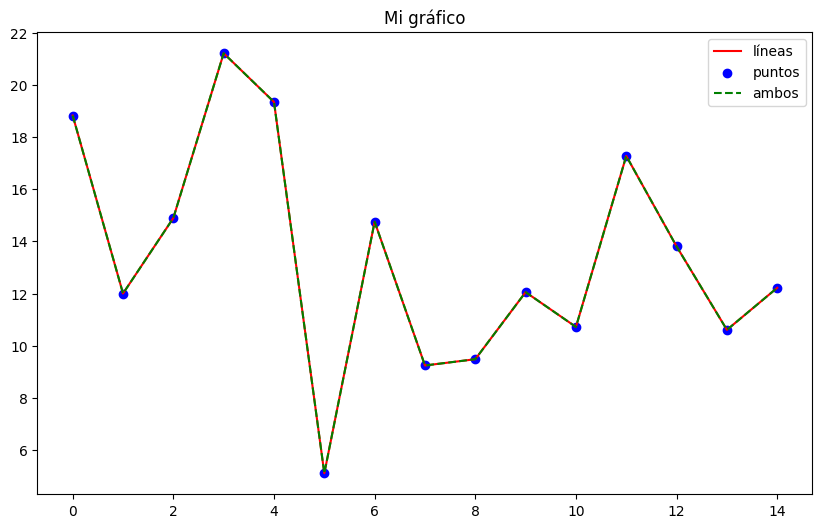

In [269]:
import matplotlib.pyplot as plt
import numpy as np

# Establece la semilla aleatoria para reproducibilidad.
np.random.seed(0)

# Genera datos aleatorios utilizando la distribución normal con media 10 y desviación estándar 5
data = np.random.normal(10, 5, 15)
# Crear el plot
plt.figure(figsize=(10, 6))

# Add the lines for each type
plt.plot(data, color='red', label='líneas')               # Línea roja
plt.scatter(range(len(data)), data, color='blue', label='puntos')  # Puntos azules
plt.plot(data, 'g--', label='ambos')                      # Línea discontinua verde que muestra ambos.

# Título y legendas
plt.title('Mi gráfico')
plt.legend(loc='upper right')

# mostrar el plot
plt.show()

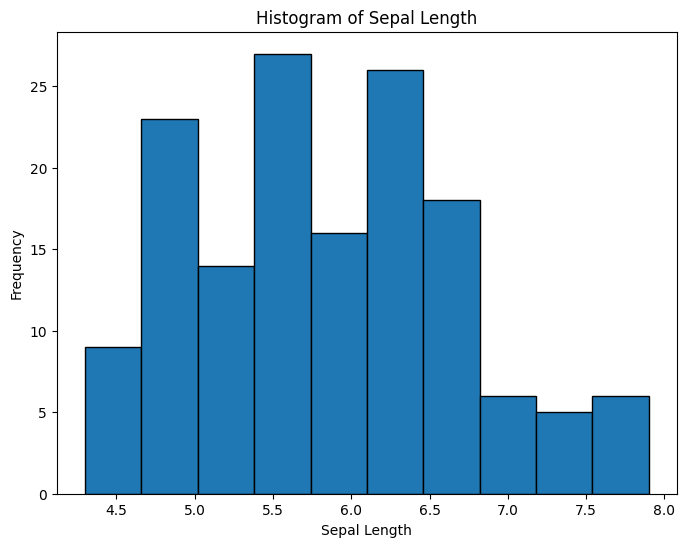

In [270]:
import matplotlib.pyplot as plt


# Selecciona la columna sepal length
sepal_length = iris_df['sepal length (cm)']

# Crea un histograma de sepal length
plt.figure(figsize=(8, 6))
plt.hist(sepal_length, edgecolor='black', )

# Título y legendas
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')


plt.show()


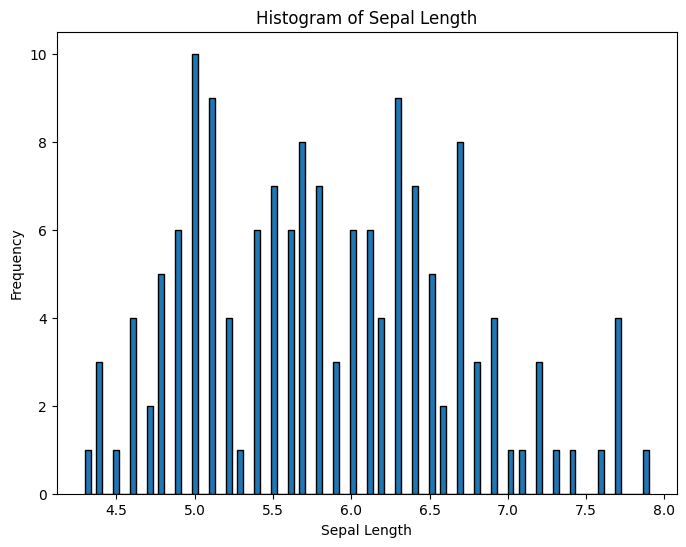

In [271]:
plt.figure(figsize=(8, 6))
plt.hist(sepal_length, edgecolor='black', bins=100)

# Título y legendas
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Density of Sepal Length')

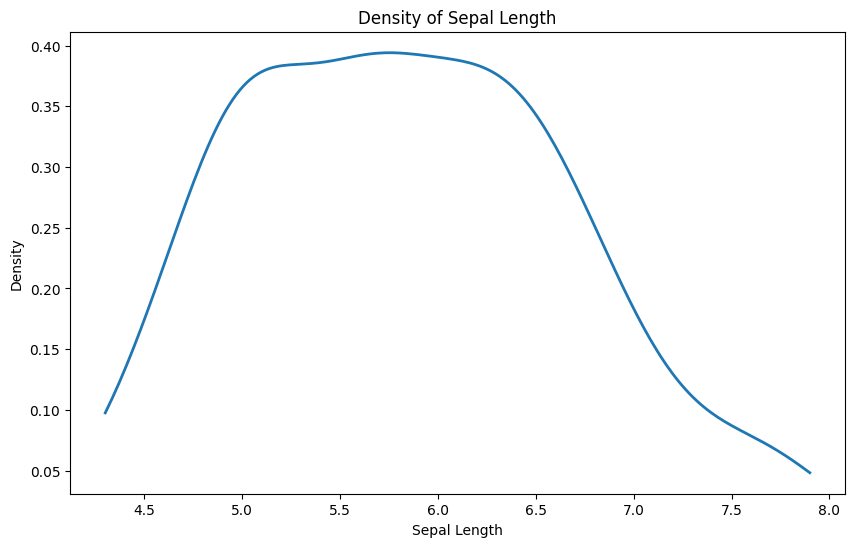

In [272]:
from scipy import stats

# Calcula la densidad de la función
density = stats.gaussian_kde(sepal_length)
# Genera un rango de valores para los cuales queremos estimar la densidad.
xs = np.linspace(sepal_length.min(), sepal_length.max(), 200)
# Calcula la densidad para cada valor en xs.
density_values = density(xs)
# Crea la figura
plt.figure(figsize=(10, 6))
plt.plot(xs, density_values, linewidth=2)
# Título y legendas
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Density of Sepal Length')

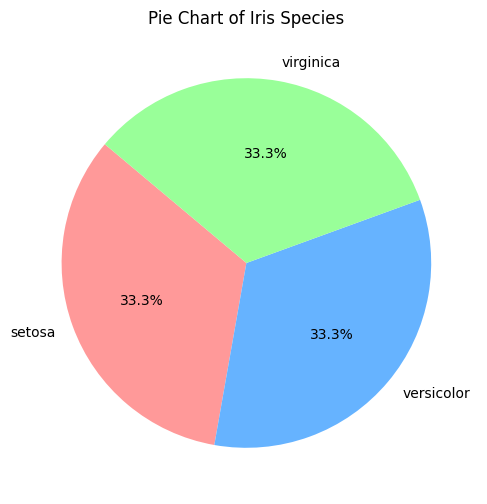

In [273]:
species_counts = iris_df["species"].value_counts()
species_names = iris_df['species'].cat.categories.tolist()
species_proportions = species_counts / species_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(species_proportions, labels=species_names, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
# Título
plt.title('Pie Chart of Iris Species')
plt.show()

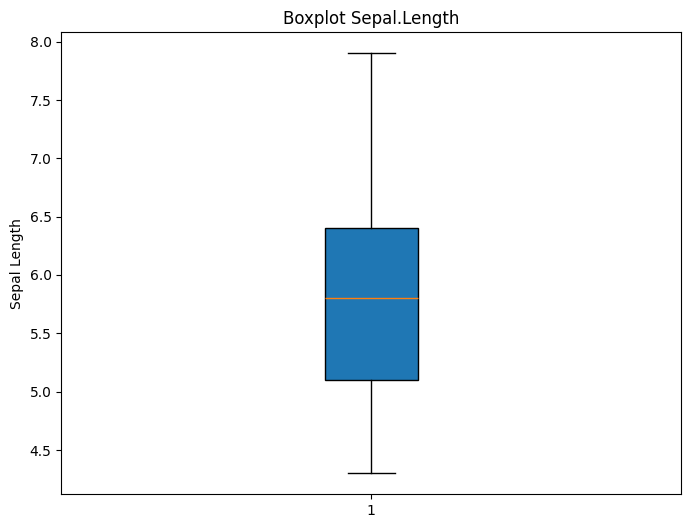

In [274]:
# Crea a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(sepal_length, patch_artist=True)

# Títulos y leyendas
plt.ylabel('Sepal Length')
plt.title('Boxplot Sepal.Length')

# Muestra the plot
plt.show()

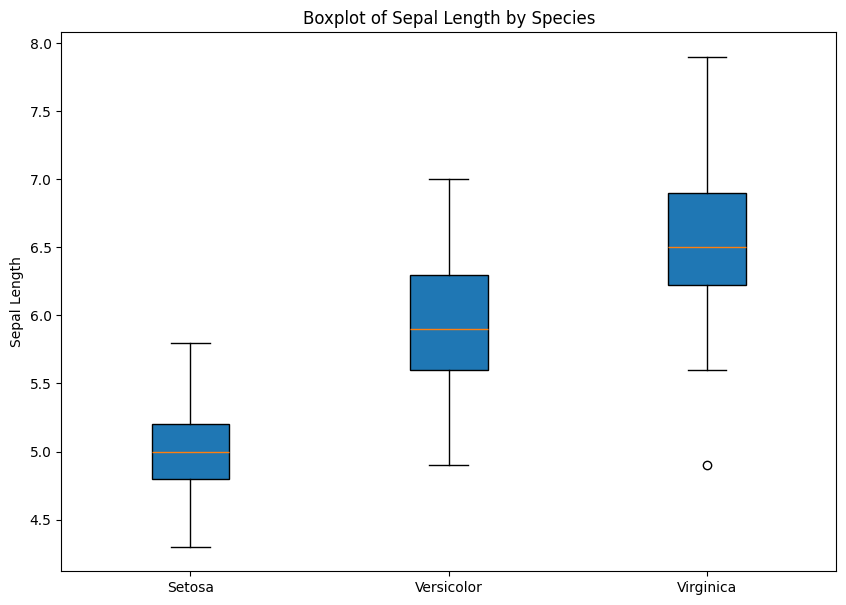

In [275]:
setosa_sample = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sample = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sample = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Combina los ejemplos en un sólo dataset
data_to_plot = [setosa_sample, versicolor_sample, virginica_sample]
species = ['Setosa', 'Versicolor', 'Virginica']

# Crea un boxplot agrepado
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, patch_artist=True)

# Agrega las etiquetas
plt.xticks([1, 2, 3], species)
plt.ylabel('Sepal Length')

# Título
plt.title('Boxplot of Sepal Length by Species')

# Mostrar the plot
plt.show()


Text(0.5, 1.0, 'Comparative Boxplots of Iris Measurements')

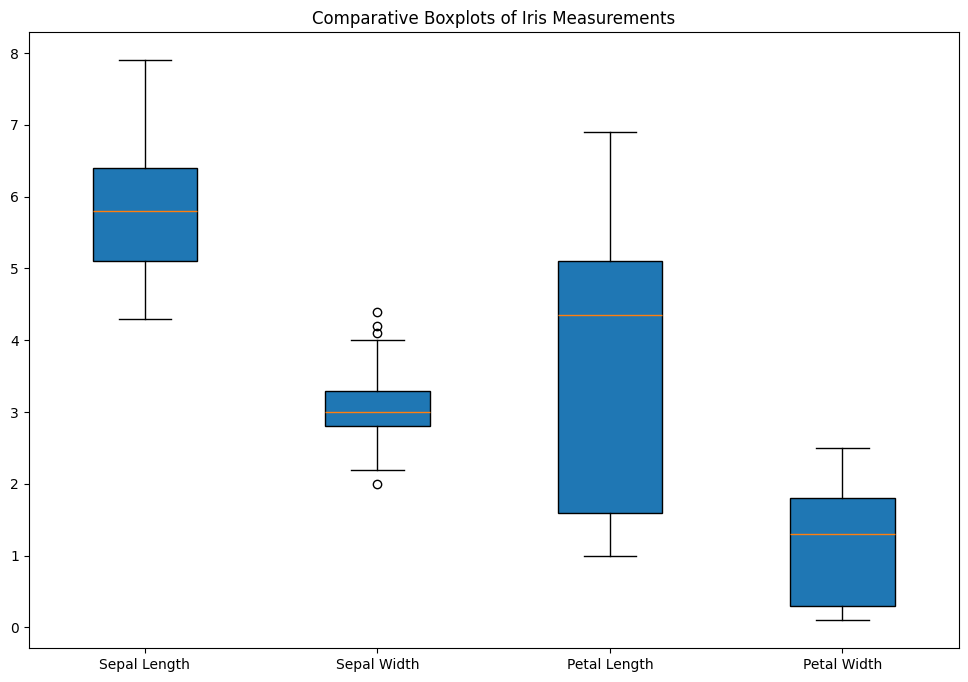

In [276]:
sepal_width_sample = iris_df['sepal width (cm)']
sepal_length_sample = iris_df['sepal length (cm)']
petal_length_sample = iris_df['petal length (cm)']
petal_width_sample = iris_df['petal width (cm)']

# Combina los ejemplos en un sólo dataset
data_to_plot = [sepal_length_sample, sepal_width_sample, petal_length_sample, petal_width_sample]
measurements = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Crea boxplots comparativos
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, patch_artist=True)

# Agregar etiquetas
plt.xticks([1, 2, 3, 4], measurements)
plt.title('Comparative Boxplots of Iris Measurements')

In [277]:
import plotly.graph_objects as go

setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Crear una figura
fig = go.Figure()
# Agregar los boxplots para cada especie
fig.add_trace(go.Box(y=setosa_sepal_length, name='Setosa', marker_color='red'))
fig.add_trace(go.Box(y=versicolor_sepal_length, name='Versicolor', marker_color='green'))
fig.add_trace(go.Box(y=virginica_sepal_length, name='Virginica', marker_color='blue'))

# Agregar títulos y etiquetas
fig.update_layout(
   title='Sepal Length by Species',
   yaxis_title='Sepal Length',
   boxmode='group'  # Agrupar juntas las cajas de los diferentes trazos para cada categoría
)

Text(0.5, 1.0, 'Sepal Width vs. Sepal Length')

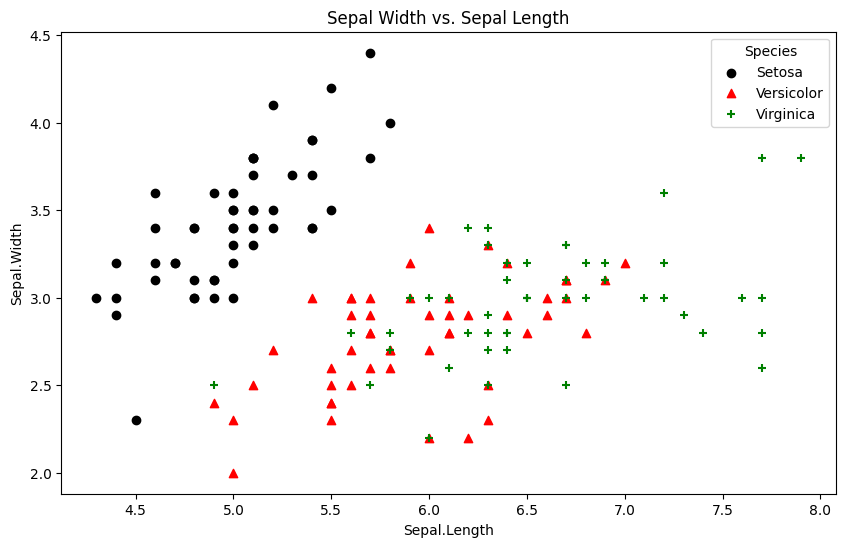

In [278]:
import matplotlib.pyplot as plt


setosa_sepal_width = iris_df[iris_df['species'] == 'setosa']['sepal width (cm)']
versicolor_sepal_width = iris_df[iris_df['species'] == 'versicolor']['sepal width (cm)']
virginica_sepal_width = iris_df[iris_df['species'] == 'virginica']['sepal width (cm)']

# Plot
plt.figure(figsize=(10, 6))

# Setosa Plot
plt.scatter(setosa_sepal_length, setosa_sepal_width, c='black', marker='o', label='Setosa')
# Versicolor Plot
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, c='red', marker='^', label='Versicolor')
# Virginica Plot
plt.scatter(virginica_sepal_length, virginica_sepal_width, c='green', marker='+', label='Virginica')

# Legendas
plt.legend(title='Species')

# Título y ejes
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal Width vs. Sepal Length')

In [279]:
import plotly.express as px

# Correct species names in the color map
fig = px.scatter(iris_df, 
                 x='sepal length (cm)', 
                 y='sepal width (cm)', 
                 color='species', 
                 color_discrete_map={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})

# Show the plot
fig.show()



In [280]:
# Crear una figura
fig = go.Figure()
# Agregar los boxplots para cada especie
fig.add_trace(go.Box(y=setosa_sepal_length, name='Setosa', marker_color='red'))
fig.add_trace(go.Box(y=versicolor_sepal_length, name='Versicolor', marker_color='green'))
fig.add_trace(go.Box(y=virginica_sepal_length, name='Virginica', marker_color='blue'))

# Agregar títulos y etiquetas
fig.update_layout(
   title='Sepal Length by Species',
   yaxis_title='Sepal Length',
   boxmode='group'  # Agrupar juntas las cajas de los diferentes trazos para cada categoría
)

Text(0.5, 1.0, 'Sepal Width vs. Sepal Length')

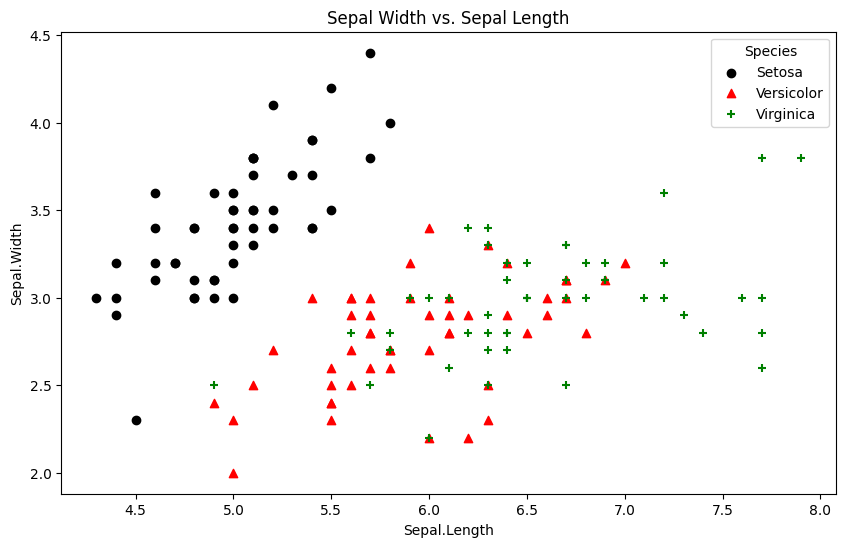

In [281]:
# Plot
plt.figure(figsize=(10, 6))

# Setosa Plot
plt.scatter(setosa_sepal_length, setosa_sepal_width, c='black', marker='o', label='Setosa')
# Versicolor Plot
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, c='red', marker='^', label='Versicolor')
# Virginica Plot
plt.scatter(virginica_sepal_length, virginica_sepal_width, c='green', marker='+', label='Virginica')

# Legendas
plt.legend(title='Species')

# Título y ejes
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal Width vs. Sepal Length')


In [282]:
fig = px.scatter_matrix(iris_df,
   dimensions=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
   color='species',
   symbol='species',
   title='Pair plot of Iris dataset'
)

fig.show()

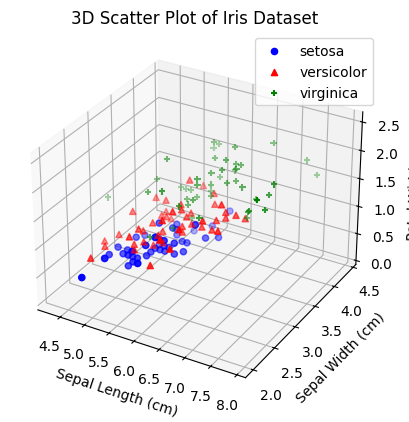

In [283]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa': 'b', 'versicolor': 'r', 'virginica': 'g'}
markers = {'setosa': 'o', 'versicolor': '^', 'virginica': '+'}

# Scatter plot based on species
for species, c, m in zip(colors.keys(), colors.values(), markers.values()):
    species_data = iris_df[iris_df['species'] == species]
    ax.scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'], species_data['petal width (cm)'], 
               c=c, marker=m, label=species)

# Set axis labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Width (cm)')

# Show legend and title
plt.legend()
plt.title('3D Scatter Plot of Iris Dataset')

# Show the plot
plt.show()


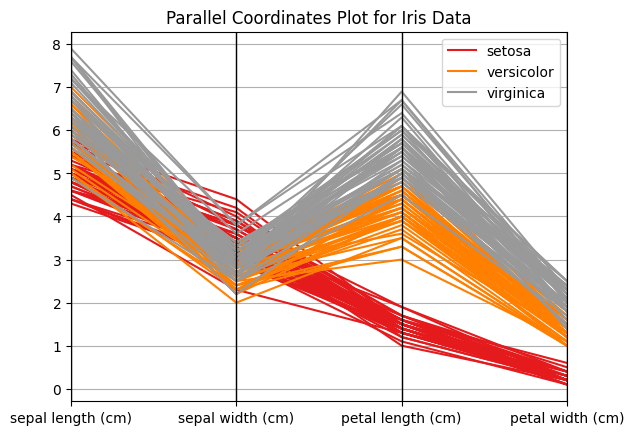

In [284]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.columns

iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


parallel_coordinates(iris_df, 'species', colormap=plt.get_cmap("Set1"))

# Add a title to the plot
plt.title('Parallel Coordinates Plot for Iris Data')

# Show the plot
plt.show()

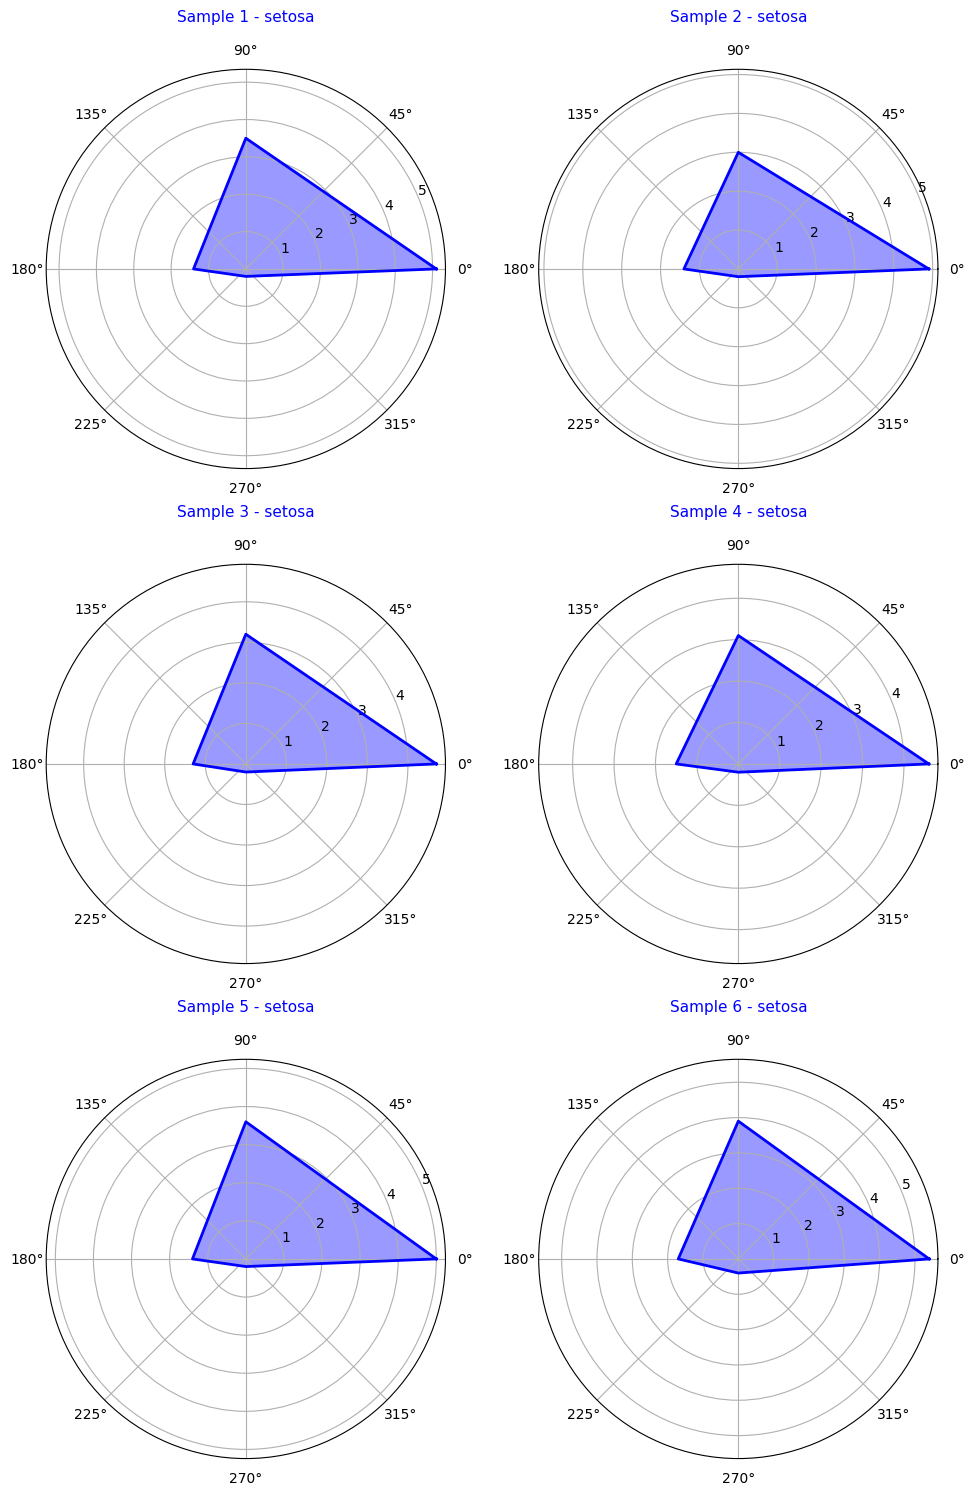

In [285]:
import numpy as np
import matplotlib.pyplot as plt

data = iris_df

# Número de variables
num_vars = len(data.columns) - 1

# Calcular los ángulos para cada eje
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]  # to complete the loop

# Función Radar chart
def make_spider(row, title, color):
    values = data.iloc[row].drop('species').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Beautify el plot
    plt.title(title, size=11, color=color, y=1.1)

# Inicializa spider plot
fig = plt.figure(figsize=(10, 15))

# Create a radar chart for the first 6 samples
for i in range(min(data.shape[0], 6)):  # Limit to 6 samples
    ax = plt.subplot(3, 2, i + 1, polar=True)
    make_spider(i, f'Sample {i + 1} - {data.iloc[i]["species"]}', 'blue')

plt.tight_layout()
plt.show()
